# Import Modules

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Closing Step

## Dilation
Proses penggabungan titik-titik latar menjadi bagian dari objek berdasarkan SE(Structure Element) yang digunakan.

### Read original image

In [2]:
raw_image = cv2.imread("../images/original/original.png", 0)
height, width = raw_image.shape

### Show original image

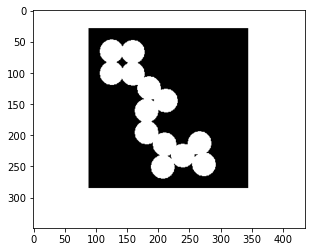

In [3]:
plt.imshow(raw_image, cmap="gray")

### Define structuring element and constant

In [4]:
k                = 3
constant_dilated = 1
SED              = np.ones((k, k), dtype=np.uint8)
image_dilated    = np.zeros((height, width), dtype=np.uint8)

### Image dilation

True

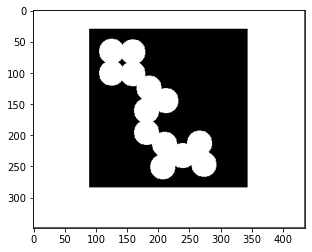

In [5]:
for i in range(constant_dilated, height-constant_dilated):
    for j in range(constant_dilated, width-constant_dilated):
        temp               = raw_image[i-constant_dilated:i+constant_dilated + 1, j-constant_dilated:j+constant_dilated+1]
        product            = temp * SED
        image_dilated[i,j] = np.max(product)

plt.imshow(image_dilated,cmap="gray")
cv2.imwrite("../images/dilation/dilated.png", image_dilated)

## Erosion
Proses penghapusan titik-titik objek menjadi bagian dari latar berdasarkan SE(Structure Elemen) yang digunakan.

### Read image after dilation

In [6]:
image_dilated = cv2.imread("../images/dilation/dilated.png", 0)
height, width = image_dilated.shape

### Show image after dilation

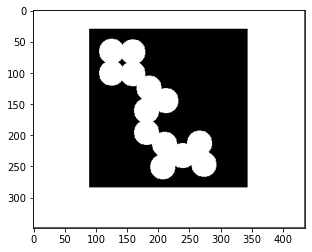

In [7]:
plt.imshow(image_dilated, cmap="gray")

###  Define structuring element and constant

In [8]:
k               = 3
SE              = np.ones((k, k), dtype=np.uint8)
constant_eroded = (k-1)//2
image_eroded    = np.zeros((height, width), dtype=np.uint8) 

### Image Erotion

True

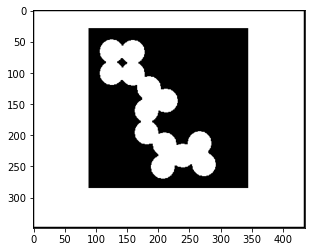

In [9]:
for i in range(constant_eroded, height-constant_eroded):
    for j in range(constant_eroded, width-constant_eroded):
        temp              = image_dilated[i-constant_eroded:i+constant_eroded+1, j-constant_eroded:j+constant_eroded+1]
        product           = temp * SE
        image_eroded[i,j] = np.min(product)

plt.imshow(image_eroded, cmap="gray")
cv2.imwrite("../images/erosion/eroted.png", image_eroded)

# Use Open CV Library

## Define function

In [14]:
kernel  = np.ones((k, k), dtype=np.uint8)
closing = cv2.morphologyEx(raw_image, cv2.MORPH_CLOSE, kernel)

## Show image after closing

True

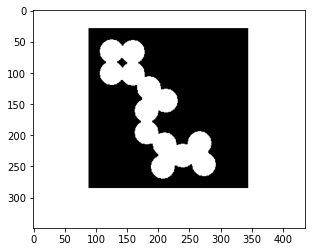

In [15]:
plt.imshow(closing, cmap="gray")
cv2.imwrite("../images/erosion/eroted_open_cv2.png", closing)

# Conclusion
- Jadi proses morfologi closing adalah dilasi diikuti proses erosi yang biasa digunakan untuk menutup lubang-lubang kecil di objek.